<a href="https://colab.research.google.com/github/ThakurGumansingh/Cryptocurrency_price_prediction/blob/main/FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640490 sha256=32fff588c52683c31f7939d9a879caa1c9e1cf7b7a0fddc6113d249f2dcf7b02
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
from fbprophet import Prophet
import pandas as pd, matplotlib.pyplot as plt, yfinance as yf

In [5]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-05-01,37713.265625,38627.859375,37585.789062,38469.093750,38469.093750,27002760110
2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244


In [16]:
df.reset_index(inplace = True)
df = df[['Date', 'Adj Close']]

In [23]:
df.columns = ['ds', 'y']

In [24]:
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2783,2022-05-01,38469.093750
2784,2022-05-02,38529.328125
2785,2022-05-03,37750.453125
2786,2022-05-04,39698.371094


In [25]:
model = Prophet()

In [26]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [28]:
df.tail()

,ds,y
2783,2022-05-01,38469.093750
2784,2022-05-02,38529.328125
2785,2022-05-03,37750.453125
2786,2022-05-04,39698.371094
2787,2022-05-05,39756.628906


In [29]:
future_dates = model.make_future_dataframe(periods = 60)

In [31]:
future_dates.tail()

,ds
2843,2022-06-30
2844,2022-07-01
2845,2022-07-02
2846,2022-07-03
2847,2022-07-04


In [32]:
prediction = model.predict(future_dates)

In [33]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2843,2022-06-30,58352.670309,49596.463699,65099.932308,58224.906252,58453.171143,-1172.742929,-1172.742929,-1172.742929,-41.596137,-41.596137,-41.596137,-1131.146791,-1131.146791,-1131.146791,0.0,0.0,0.0,57179.927380
2844,2022-07-01,58406.533407,49449.430786,65179.263394,58270.158586,58508.172027,-1200.009071,-1200.009071,-1200.009071,9.061164,9.061164,9.061164,-1209.070235,-1209.070235,-1209.070235,0.0,0.0,0.0,57206.524337
2845,2022-07-02,58460.396506,49640.956427,64617.954261,58316.281060,58567.188432,-1270.388660,-1270.388660,-1270.388660,17.678264,17.678264,17.678264,-1288.066924,-1288.066924,-1288.066924,0.0,0.0,0.0,57190.007846
2846,2022-07-03,58514.259604,49707.886938,64881.823768,58362.813617,58628.378664,-1369.789551,-1369.789551,-1369.789551,-3.059766,-3.059766,-3.059766,-1366.729785,-1366.729785,-1366.729785,0.0,0.0,0.0,57144.470053
2847,2022-07-04,58568.122702,50018.804902,64538.745815,58409.689731,58682.302784,-1430.478608,-1430.478608,-1430.478608,13.173217,13.173217,13.173217,-1443.651825,-1443.651825,-1443.651825,0.0,0.0,0.0,57137.644094


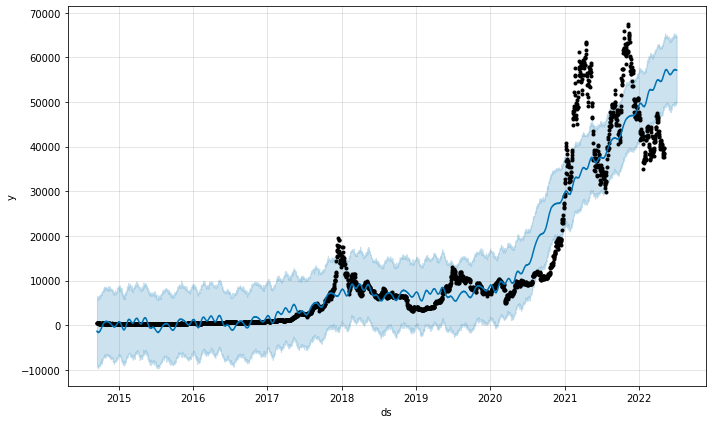

In [34]:
fig = model.plot(prediction)

In [35]:
from fbprophet.plot import plot_plotly
plot_plotly(model, prediction)

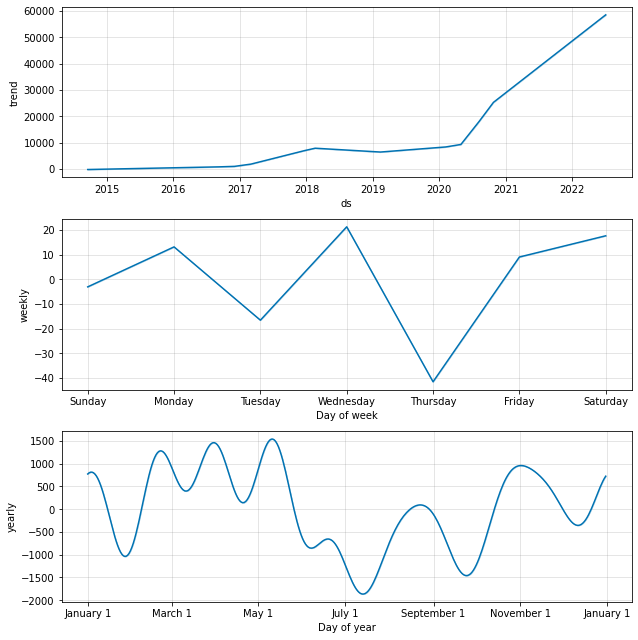

In [36]:
fig2 = model.plot_components(prediction)

In [37]:
from fbprophet.diagnostics import cross_validation

In [39]:
df_cv = cross_validation(model, horizon = '60 days')

INFO:fbprophet:Making 79 forecasts with cutoffs between 2015-10-09 00:00:00 and 2022-03-06 00:00:00


  0%|          | 0/79 [00:00<?, ?it/s]

In [41]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
4735,2022-05-01,65544.078386,57717.523507,72989.596924,38469.093750,2022-03-06
4736,2022-05-02,65658.458449,58532.984608,72687.804943,38529.328125,2022-03-06
4737,2022-05-03,65664.053269,58689.766505,73134.397950,37750.453125,2022-03-06
4738,2022-05-04,65706.749713,58365.383998,73084.416041,39698.371094,2022-03-06
4739,2022-05-05,65663.161088,58537.516366,72727.028990,39756.628906,2022-03-06


In [43]:
from fbprophet.diagnostics import performance_metrics

In [44]:
df_performance = performance_metrics(df_cv)

In [45]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,5.699436e+07,7549.461081,3794.303924,0.210336,0.162009,0.312236
1,7 days,5.859133e+07,7654.497443,3855.002978,0.214956,0.165856,0.308017
2,8 days,5.996108e+07,7743.454308,3926.744897,0.219765,0.173915,0.305907
3,9 days,6.102757e+07,7812.014260,3999.961117,0.224847,0.177599,0.308017
4,10 days,6.275615e+07,7921.877855,4076.697750,0.231271,0.182243,0.308017
5,11 days,6.363649e+07,7977.248084,4148.578379,0.237716,0.187347,0.314346
6,12 days,6.473384e+07,8045.734483,4206.085404,0.242910,0.199315,0.314346
7,13 days,6.539531e+07,8086.736724,4274.954064,0.249399,0.209972,0.314346
8,14 days,6.474638e+07,8046.513479,4298.517030,0.254396,0.216141,0.314346
9,15 days,6.439041e+07,8024.363475,4301.892573,0.259582,0.222929,0.310127


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



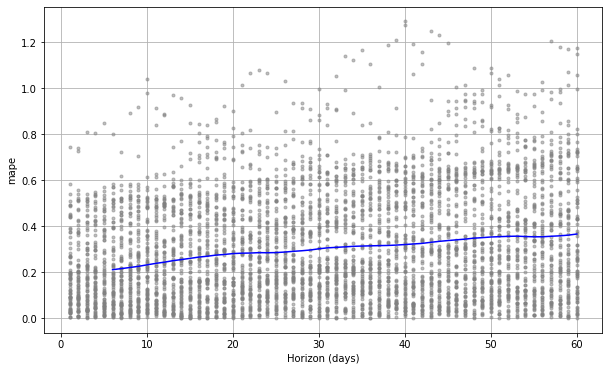

In [50]:
from fbprophet import plot
fig2 = plot.plot_cross_validation_metric(df_cv, metric='mape')